***Import relevant libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

***Loading our dataset***

In [2]:
data = pd.read_csv('C:\\Users\\Pc\\Desktop\\GoMyCode\\titanic-passengers.csv', sep=';',encoding='unicode_escape')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [3]:
#Description of the dataset
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Data preprocessing***

1. Dealing with missing values

In [4]:
data['Age']=data['Age'].replace(np.NaN, data['Age'].mean())
data['Age'].isnull().sum()

0

In [5]:
data['Cabin']=data['Cabin'].replace(np.NaN, data['Cabin'].mode()[0])
data['Cabin']


0      B96 B98
1        F G73
2      B96 B98
3      B96 B98
4          B71
        ...   
886    B96 B98
887    B96 B98
888    B96 B98
889    B96 B98
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [6]:
data['Embarked']=data['Embarked'].dropna
data['Embarked'].isnull().sum()

0

2. Data cleaning: dropping useless columns

In [7]:
#data.drop(['Ticket'],axis=1)
#data.drop(['Cabin'], axis = 1)
#data.drop(['Name'], axis = 1)
#data.head()

In [8]:
cor=data.corr()
cor

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000


3. Data Visualization

In [9]:
cor=data.corr()
cor

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000


In [10]:
data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
No,447.016393,2.531876,30.415100,0.553734,0.329690,22.117887
Yes,444.368421,1.950292,28.549778,0.473684,0.464912,48.395408


<AxesSubplot:xlabel='Survived', ylabel='count'>

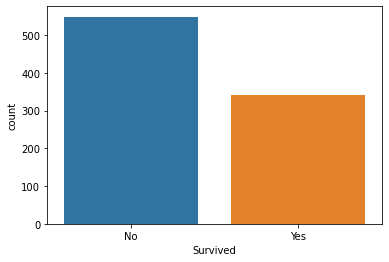

In [11]:
sns.countplot(data=data, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

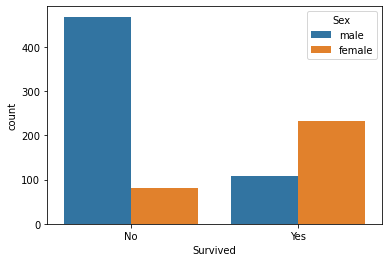

In [12]:
sns.countplot(data=data, x='Survived', hue='Sex')

***Building our ligistic regression model for survival prediction***

1.Preparing data for logistic regression

In [13]:
#convert survived variable into numerical
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})   
#data.head()

In [14]:
#convert sex variable into numerical
#data['Sex'].replace({'Male':0, 'Female':1}, inplace=True)
#data.head()

In [45]:
#Feature values
x = data[['Age','Pclass','SibSp']]
#Target values
y = data['Survived']

2.Splitting Training and Test Data

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 

In [47]:
#checking our training data
x_train

,Age,Pclass,SibSp
105,38.000000,3,0
68,30.000000,2,0
253,30.000000,2,0
320,24.000000,3,0
706,29.699118,3,0
...,...,...,...
835,36.000000,2,0
192,28.000000,2,1
629,36.000000,3,1
559,33.000000,3,0


In [48]:
#cheking test data
x_test

,Age,Pclass,SibSp
495,29.699118,1,1
648,29.699118,2,0
278,22.000000,1,0
31,25.000000,2,1
255,29.699118,1,1
...,...,...,...
167,51.000000,3,0
306,29.699118,3,0
379,20.000000,3,1
742,42.000000,1,1


In [49]:
y_test

495    1
648    0
278    1
31     0
255    1
      ..
167    0
306    0
379    1
742    0
10     0
Name: Survived, Length: 223, dtype: int64

3.Building our model

In [51]:
#build our logistic model
logreg = LogisticRegression()  

#fitting training data
logreg.fit(x_train, y_train)  

#testing model’s performance
#np.reshape(y_test)
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(y_test,y_pred)))

ValueError: Expected 2D array, got 1D array instead:
array=[1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0
 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

4.Plotting our model

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

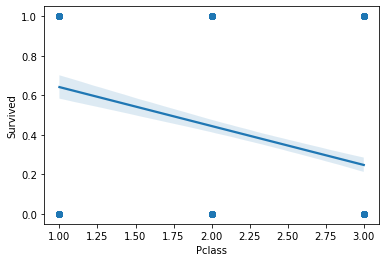

In [52]:
import seaborn as sns
sns.regplot(x='Pclass',y='Survived',data=data)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

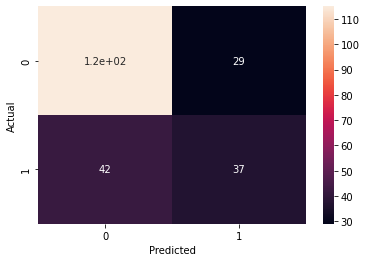

In [53]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [55]:
#confusion matrix
pd.confusion_matrix(confusion_matrix(y_test, y_pred), columns=['Predicted No','Predicted yes'], index=['Actual No', 'Actual Yes'])
#confusion_mat = confusion_matrix(y_test,y_pred)
#print(confusion_mat)
#print(classification_report(y_test,y_pred))


AttributeError: module 'pandas' has no attribute 'confusion_matrix'

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       144
           1       0.56      0.47      0.51        79

    accuracy                           0.68       223
   macro avg       0.65      0.63      0.64       223
weighted avg       0.67      0.68      0.67       223



Precision is fine considering model selected and available data. accuracy can be increased by further using more features and/or by using other model.

**ROC / AUC validation matrix**

AUC: Area Under the ROC Curve
AUC is an effective way to summarize the overall diagnostic accuracy of the test. It takes values from 0 to 1, where a value of **0 indicates a perfectly inaccurate test** and a value of **1 reflects a perfectly accurate test**.

In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), **0.7 to 0.8 is considered acceptable**, **0.8 to 0.9 is considered excellent**, and **more than 0.9 is considered outstanding**

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.678


Text(0, 0.5, 'True Positive Rate')

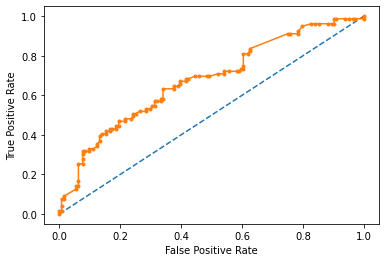

In [61]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#The AUC for the ROC can be calculated using the roc_auc_score() function.
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logreg.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')